# EDA

In [ ]:
from google.colab import drive
# Download the raw data from https://www.kaggle.com/lava18/google-play-store-apps,
# then upload to Google Driver "COEN 240 Term Project" folder
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!find "/content/drive/MyDrive/COEN 240 Term Project/" -name "*google*" 

/content/drive/MyDrive/COEN 240 Term Project/googleplaystore_user_reviews.csv
/content/drive/MyDrive/COEN 240 Term Project/googleplaystore.csv
/content/drive/MyDrive/COEN 240 Term Project/google_apps_code.html
/content/drive/MyDrive/COEN 240 Term Project/google_play_store_apps_rating.ipynb


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
df_apps = pd.read_csv("/content/drive/MyDrive/COEN 240 Term Project/googleplaystore.csv")
print(df_apps.shape)
df_apps.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Note the missing values exist in Rating column, since Rating is our target variable, we will drop entries without a valid rating
df_apps[df_apps.duplicated()].shape  # total 483 duplicates, need to drop

(483, 13)

In [ ]:
df_apps.describe()  # the max score seems suspicious

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df_apps[df_apps['Rating'] > 5]  # will drop this outlier

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df_apps[['Reviews', 'Size', 'Installs', 'Price']].describe(include=object)  # can probably drop App and Current Ver? Need to convert few columns (e.g. size, price) to numerical

,Reviews,Size,Installs,Price
count,10841,10841,10841,10841
unique,6002,462,22,93
top,0,Varies with device,"1,000,000+",0
freq,596,1695,1579,10040


In [ ]:
df_apps[['App', 'Last Updated', 'Current Ver', 'Android Ver']].describe(include=object)

,App,Last Updated,Current Ver,Android Ver
count,10841,10841,10833,10838
unique,9660,1378,2832,33
top,ROBLOX,"August 3, 2018",Varies with device,4.1 and up
freq,9,326,1459,2451


In [ ]:
df_apps.Size.value_counts()  # will convert it to float or bucket

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [ ]:
df_apps.Category.value_counts()  # drop 1.9

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

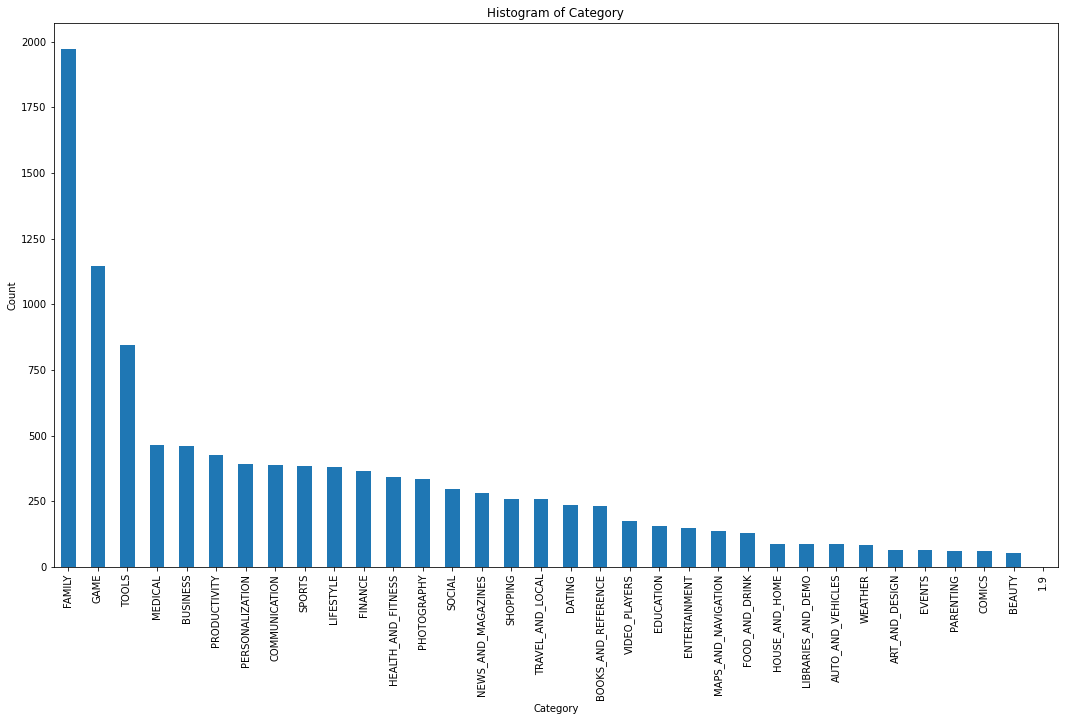

In [ ]:
plt.figure(figsize=(18,10))
df_apps['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Histogram of Category")
plt.show()

In [ ]:
df_apps.Genres.value_counts() # will group some unpopular genres later

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

In [ ]:
df_apps['Genres'].value_counts().nlargest(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

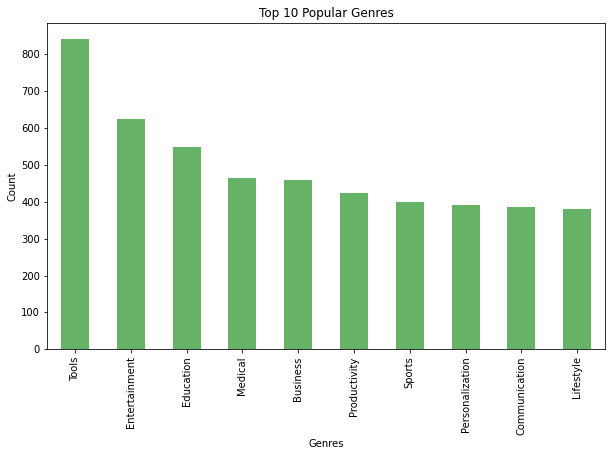

In [ ]:
# View the top 10 popular genres
plt.figure(figsize=(10, 6))
df_apps['Genres'].value_counts().nlargest(10).plot(kind='bar', color="green", alpha=0.6)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 10 Popular Genres')
plt.show()

In [ ]:
df_apps['Last Updated'].value_counts()  # can derive a new column "Days Since Last Updated" from it

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
March 20, 2014          1
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 23, 2014          1
Name: Last Updated, Length: 1378, dtype: int64

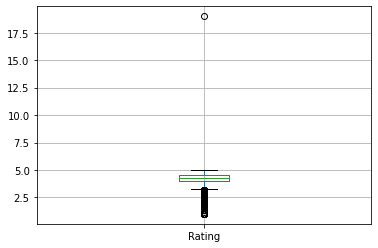

In [ ]:
boxplot = df_apps.boxplot(column=['Rating'])
boxplot.plot()

plt.show()

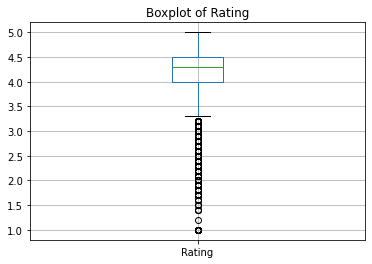

In [ ]:
boxplot_wo_outlier = df_apps[df_apps['Rating'] <= 5].boxplot(column=['Rating'])
boxplot_wo_outlier.plot()
plt.title("Boxplot of Rating")
plt.show()  # highly left skewed

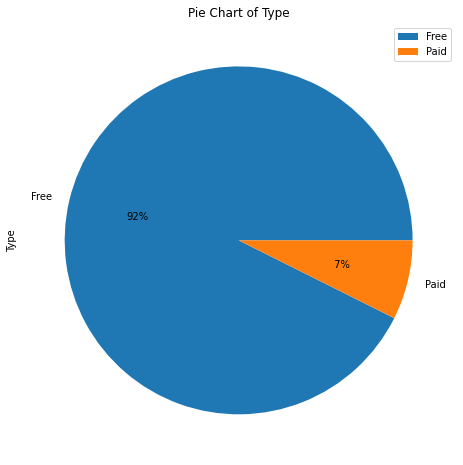

In [ ]:
# Type
plt.figure(figsize=(8, 8))
df_apps[df_apps['Type'] != "0"].Type.value_counts().plot(kind='pie', autopct="%2i%%")
plt.legend()
plt.title("Pie Chart of Type")
plt.show()

# Feature Engineering

### Duplicates and NaN

In [ ]:
# Drop duplicated entries
print(f"Total {len(df_apps)} records before processing")
df_apps.drop_duplicates(inplace=True)
print(f"After dropping duplicates, there are {len(df_apps)} records left")


Total 10841 records before processing
After dropping duplicates, there are 10358 records left


### Numerical Variables

In [ ]:
# Rating field -- fill the N/A with the median value 
df_apps['Rating'] = df_apps['Rating'].fillna(df_apps['Rating'].median())
# converting into a float data type and removing the outlier 19
df_apps = df_apps[df_apps['Rating'] != 19]
df_apps['Rating'] = df_apps['Rating'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Drop the 1.9 from Category
df_apps = df_apps[df_apps['Category'] != '1.9']

In [ ]:
# Price field -- cleaning the field from $ sign, string values and converting into a float data type
df_apps['Price'] = df_apps['Price'].apply(lambda x : x.strip('$'))
df_apps['Price'] = df_apps['Price'].str.replace('Everyone','0')
df_apps['Price'] = df_apps['Price'].astype(float)

In [ ]:
# Installs field -- cleaning the field from + sign, string values and converting into an integer data type
df_apps['Installs'] = df_apps['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df_apps['Installs'] = df_apps['Installs'].str.replace('Free','0')
df_apps['Installs'] = df_apps['Installs'].astype(int)

In [ ]:
# Reviews field -- replacing the one 3.0M value with a numerical value and converting into integer
df_apps['Reviews'] = df_apps['Reviews'].str.replace('3.0M','3000000')
# Review field -- convert to int
df_apps['Reviews'] = df_apps['Reviews'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Genres field engineering, splitting the string to get only first part 
from collections import Counter

genres = Counter(df_apps.Genres)
genres  # many of the minor groups are just sub-category of major genre

Counter({'Action': 356,
         'Action;Action & Adventure': 15,
         'Adventure': 75,
         'Adventure;Action & Adventure': 13,
         'Adventure;Brain Games': 1,
         'Adventure;Education': 2,
         'Arcade': 218,
         'Arcade;Action & Adventure': 15,
         'Arcade;Pretend Play': 1,
         'Art & Design': 58,
         'Art & Design;Action & Adventure': 2,
         'Art & Design;Creativity': 7,
         'Art & Design;Pretend Play': 2,
         'Auto & Vehicles': 85,
         'Beauty': 53,
         'Board': 44,
         'Board;Action & Adventure': 3,
         'Board;Brain Games': 15,
         'Board;Pretend Play': 1,
         'Books & Reference': 230,
         'Books & Reference;Creativity': 1,
         'Books & Reference;Education': 2,
         'Business': 427,
         'Card': 48,
         'Card;Action & Adventure': 2,
         'Card;Brain Games': 1,
         'Casino': 39,
         'Casual': 191,
         'Casual;Action & Adventure': 18,
         'Casual;Bra

In [ ]:
df_apps['Genres'] = [genre.split(';')[0] for genre in df_apps['Genres']]  # only take the part before ;
df_apps.loc[df_apps['Genres'] == 'Music & Audio', 'Genres'] = 'Music'
df_apps['Genres'].value_counts()  # much fewer categories now

Tools                      843
Entertainment              628
Education                  610
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          233
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     162
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   109
Educational                106
Adventure                   91
Auto & V

In [ ]:
#df_apps['Last Updated'] = df_apps['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%d-%b-%y').timetuple()))
df_apps = df_apps[df_apps['Last Updated'] != '1.0.19']  # drop this entry with wrong format
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Creating new field Days Since Last Updated
benchmark_date = datetime.strptime('2018-09-05', '%Y-%m-%d')  # use the date that the dataset was uploaded to Kaggle as our benchmark
df_apps = df_apps[df_apps['Last Updated'] != '1.0.19']  # drop this entry with wrong format 
df_apps['Days Since Last Updated'] = [(benchmark_date - datetime.strptime(d, '%B %d, %Y')).days for d in df_apps['Last Updated']]
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days Since Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,241
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,233
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,35
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,89
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up,77


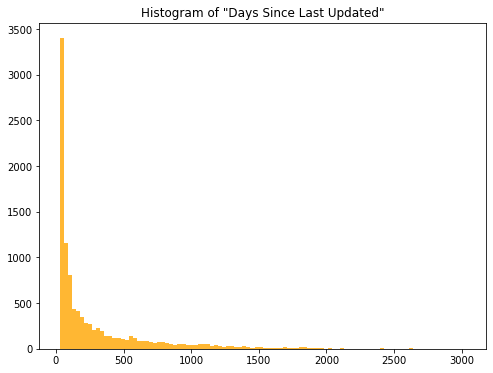

In [ ]:
# TBA: consider adding a distribution graph of df_apps['Days Since Last Updated']
plt.figure(figsize=(8, 6))
df_apps['Days Since Last Updated'].hist(bins=100, stacked=True, alpha=0.8, color="orange")
plt.title('Histogram of "Days Since Last Updated"')
plt.grid()
plt.show()

In [ ]:
df_apps.describe()  # at this point, all the numerical variables should be processed (note the highly skewed distributions, will scale after train/test split)

,Rating,Reviews,Installs,Price,Days Since Last Updated
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000,10357.000000
mean,4.203737,4.059046e+05,1.415776e+07,1.030800,294.607415
std,0.485594,2.696778e+06,8.023955e+07,16.278625,398.628012
min,1.000000,0.000000e+00,0.000000e+00,0.000000,28.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000,48.000000
50%,4.300000,1.680000e+03,1.000000e+05,0.000000,108.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000,367.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,3029.000000


In [ ]:
df_apps.describe(include=object)

,App,Category,Size,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10357,10357,10357,10356,10357,10357,10357,10349,10355
unique,9659,33,461,2,6,47,1377,2831,33
top,ROBLOX,FAMILY,Varies with device,Free,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,1526,9591,8382,843,298,1302,2379


In [ ]:
# Size field -- it has a lot of varios KB and MB values in the form of K and M. Transformation into the same standard is needed. Also changing it into the float data type
kilobytes = df_apps['Size'].loc[df_apps['Size'].str.contains('k')].index.tolist()
conversions = pd.DataFrame(df_apps.loc[kilobytes, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df_apps.loc[kilobytes,'Size'] = conversions

# Size cleaning
df_apps['Size'] = df_apps['Size'].apply(lambda x: x.strip('M'))
df_apps[df_apps['Size'] == 'Varies with device'] = 0
df_apps['Size'] = df_apps['Size'].astype(float)

#### Correlation Matrix

In [ ]:
df_apps.corr()  # note the positive correlation between Installs and Reviews, negative correlation between Rating and Days Since Last Updated

,Rating,Reviews,Size,Installs,Price,Days Since Last Updated
Rating,1.000000,0.075666,0.343158,0.070810,0.018599,0.237742
Reviews,0.075666,1.000000,0.242407,0.634826,-0.008240,-0.062319
Size,0.343158,0.242407,1.000000,0.178672,-0.013614,-0.109388
Installs,0.070810,0.634826,0.178672,1.000000,-0.008744,-0.060621
Price,0.018599,-0.008240,-0.013614,-0.008744,1.000000,0.007801
Days Since Last Updated,0.237742,-0.062319,-0.109388,-0.060621,0.007801,1.000000


### Categorical Variables

In [ ]:
# Drop categorical columns that not needed
df_apps.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)
df_apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Days Since Last Updated
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,241
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,233
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,35
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,89
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,77


### One-hot encoding

In [ ]:
df_apps_oh = pd.get_dummies(df_apps, columns=['Genres', 'Category', 'Type', 'Content Rating'])
df_apps_oh.head()

,Rating,Reviews,Size,Installs,Price,Days Since Last Updated,Genres_0,Genres_Action,Genres_Adventure,Genres_Arcade,...,Type_0,Type_Free,Type_Paid,Content Rating_0,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19.0,10000,0.0,241,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,3.9,967,14.0,500000,0.0,233,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,4.7,87510,8.7,5000000,0.0,35,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,4.5,215644,25.0,50000000,0.0,89,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4.3,967,2.8,100000,0.0,77,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Train/Test Split and Scaling

Scale Data *After* Train/Test Split (avoid data leakage problem)

In [ ]:
#Train/Test Split and Scaling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_apps_oh.iloc[:, 1:], df_apps_oh.Rating, test_size = 0.2, random_state=10)

In [ ]:
print("Training set has shape:", x_train.shape)
print("Testing set has shape:", x_test.shape)

Training set has shape: (8285, 97)
Testing set has shape: (2072, 97)


In [ ]:
# Apply normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
to_be_normalized = ['Reviews', 'Installs', 'Price', 'Size', 'Days Since Last Updated']
x_train_normalized = pd.DataFrame(scaler.fit_transform(x_train[to_be_normalized]), columns=to_be_normalized).reset_index(drop=True)
x_train_normalized.shape

(8285, 5)

In [ ]:
# Concatenate with binary columns
df_cat = x_train[[col for col in x_train.columns if col not in to_be_normalized]].reset_index(drop=True)
print(df_cat.shape, x_train_normalized.shape)
x_train_normalized = pd.concat([x_train_normalized, df_cat], axis=1)
x_train_normalized.shape

(8285, 92) (8285, 5)


(8285, 97)

In [ ]:
x_train_normalized.head()

,Reviews,Installs,Price,Size,Days Since Last Updated,Genres_0,Genres_Action,Genres_Adventure,Genres_Arcade,Genres_Art & Design,...,Type_0,Type_Free,Type_Paid,Content Rating_0,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,-0.133923,-0.135302,-0.059194,-0.366892,-0.498205,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.135286,-0.137649,-0.059194,-0.818068,-0.688266,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,-0.132391,-0.125914,-0.059194,3.377870,0.237030,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,-0.135286,-0.137649,0.149703,0.670813,1.494932,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,-0.133597,-0.125914,-0.059194,0.851284,0.212022,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Make sure to apply the same transformation to test data using the scaler trained with training data
# i.e use `transform` rather than `fit_transform`
x_test_normalized = pd.DataFrame(scaler.transform(x_test[to_be_normalized]), columns=to_be_normalized).reset_index(drop=True)
df_test_cat = x_test[[col for col in x_test.columns if col not in to_be_normalized]].reset_index(drop=True)
print(df_test_cat.shape, x_test_normalized.shape)
x_test_normalized = pd.concat([x_test_normalized, df_test_cat], axis=1)
x_test_normalized.shape

(2072, 92) (2072, 5)


(2072, 97)

In [ ]:
# # Save processed data and download to local
# x_train_normalized.to_csv('train_x.csv', index=False)
# x_test_normalized.to_csv('test_x.csv', index=False)

# y_train.to_csv('train_y.csv', index=False)
# y_test.to_csv('test_y.csv', index=False)

# from google.colab import files

# files.download('train_x.csv')
# files.download('test_x.csv')
# files.download('train_y.csv')
# files.download('test_y.csv')

# Modeling

In [ ]:
# Assigned engineered values to fields that will be used to build models
train_x=x_train_normalized
test_x=x_test_normalized
train_y=y_train
test_y=y_test
train_x.head()

,Reviews,Installs,Price,Size,Days Since Last Updated,Genres_0,Genres_Action,Genres_Adventure,Genres_Arcade,Genres_Art & Design,...,Type_0,Type_Free,Type_Paid,Content Rating_0,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,-0.133923,-0.135302,-0.059194,-0.366892,-0.498205,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.135286,-0.137649,-0.059194,-0.818068,-0.688266,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,-0.132391,-0.125914,-0.059194,3.377870,0.237030,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,-0.135286,-0.137649,0.149703,0.670813,1.494932,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,-0.133597,-0.125914,-0.059194,0.851284,0.212022,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
train_x.shape

(8285, 97)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Building Linear Regression model first 
lr_model = LinearRegression(normalize=True)
lr_model.fit(train_x, train_y)
predictions_lr=lr_model.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
pred_lr = pd.DataFrame({'Actual': test_y.tolist(), 'Predicted': predictions_lr.tolist()}).head(10)
pred_lr

,Actual,Predicted
0,3.1,4.077881
1,4.7,4.298584
2,4.2,4.306396
3,0.0,-0.000244
4,4.1,4.114990
5,4.2,4.266357
6,4.3,4.079834
7,4.3,4.089600
8,4.1,4.252686
9,4.2,4.031006


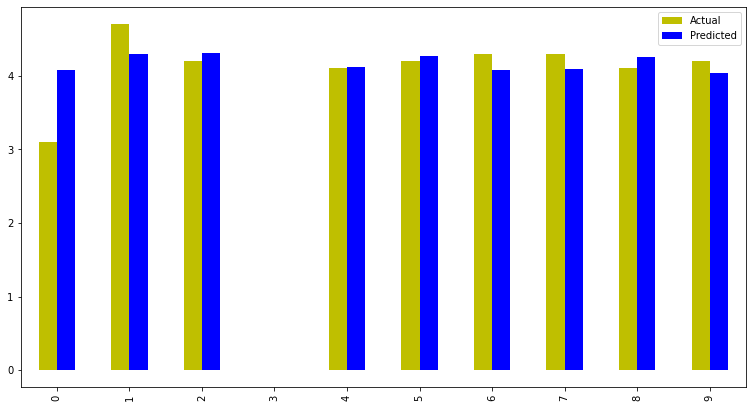

In [ ]:
pred_lr.plot(kind='bar', color=['y', 'b'], figsize=(13, 7))

In [ ]:
X2 = sm.add_constant(train_x)
model_stats = sm.OLS(train_y.values.reshape(-1,1), X2).fit()
model_stats.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1323.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:44:06   Log-Likelihood:                -5264.5
No. Observations:                8285   AIC:                         1.066e+04
Df Residuals:                    8218   BIC:                         1.113e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.396e+12   1.66e+12      0.840      0.401   -1.86e+12    4.65e+12
Reviews                            0.0312      0.007      4.310      0.000       0.017       0.045
Installs                          -0.0042      0.007     -0.617      0.538      -0.018       0.009
Price                             -0.0050      0.005     -0.955      0.340      -0.015       0.005
Size                               0.0047      0.007      0.696      0.486      -0.009       0.018
Days Since Last Updated           -0.0621      0.006    -10.936      0.000      -0.073      -0.051
Genres_0                       -3.544e+11   4.22e+11     -0.840      0.401   -1.18e+12    4.73e+11
Genres_Action                   5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Adventure                5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Arcade                   5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Art & Design             5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Auto & Vehicles          6.204e+10   7.38e+10      0.840      0.401   -8.27e+10    2.07e+11
Genres_Beauty                   6.074e+10   7.23e+10      0.840      0.401    -8.1e+10    2.02e+11
Genres_Board                    5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Books & Reference        5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Business                 6.325e+10   7.53e+10      0.840      0.401   -8.43e+10    2.11e+11
Genres_Card                     5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Casino                   5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Casual                   5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Comics                   5.987e+10   7.13e+10      0.840      0.401   -7.98e+10       2e+11
Genres_Communication            6.219e+10    7.4e+10      0.840      0.401   -8.29e+10    2.07e+11
Genres_Dating                   6.097e+10   7.26e+10      0.840      0.401   -8.13e+10    2.03e+11
Genres_Education                5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Educational              5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Entertainment            5.094e+10   6.06e+10      0.840      0.401   -6.79e+10     1.7e+11
Genres_Events                   6.152e+10   7.32e+10      0.840      0.401    -8.2e+10    2.05e+11
Genres_Finance                  6.038e+10   7.19e+10      0.840      0.401   -8.05e+10    2.01e+11
Genres_Food & Drink             6.037e+10   7.19e+10      0.840      0.401   -8.05e+10    2.01e+11
Genres_Health 

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# The most optimum number of estimators is 100 as it will be seen on the curve of estimators
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_model.fit(train_x, train_y)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestRegressor(random_state=0)
param_grid = {'n_estimators': [50, 100, 150, 200, 300],
              'max_depth': [3, 5, 8, 10]}

best_rf = GridSearchCV(rf_model, param_grid
                    , scoring='neg_mean_squared_error'
                    , verbose=1)
best_rf.fit(train_x, train_y)

print("Best parameters:", best_rf.best_params_)
print("Best RMSE: ", -best_rf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': 10, 'n_estimators': 150}
Best RMSE:  0.19239928526391267


In [ ]:
predictions_rf = best_rf.predict(test_x)

pred_rf = pd.DataFrame({'Actual': test_y.tolist(), 'Predicted': predictions_rf.tolist()}).head(10)
pred_rf.head(10)

,Actual,Predicted
0,3.1,3.989640
1,4.7,4.047733
2,4.2,4.163583
3,0.0,0.000000
4,4.1,3.935272
5,4.2,4.334774
6,4.3,4.302252
7,4.3,4.057540
8,4.1,3.997109
9,4.2,3.978962


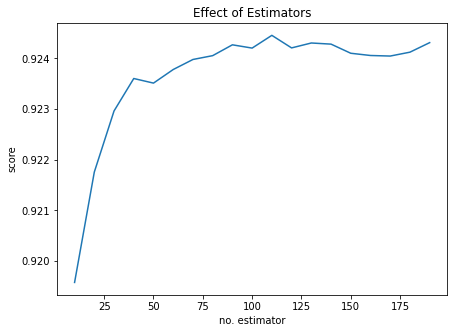

In [ ]:
# Plotting to see the most optimal number of estimators. The curve straigns out after 100 runs
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf_model.set_params(n_estimators=n)
    rf_model.fit(train_x, train_y)
    scores.append(rf_model.score(test_x, test_y))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
# Getting the features that contribute into the model the most and Size, Content Rating and Genres take up the most
var_coef_rf=pd.DataFrame()
var_coef_rf['Features'] = train_x.columns
var_coef_rf['Importance'] = rf_model.feature_importances_
var_coef_rf = var_coef_rf.sort_values('Importance', ascending=False).head(10)
var_coef_rf

,Features,Importance
3,Size,0.182383
90,Content Rating_0,0.181895
5,Genres_0,0.167557
4,Days Since Last Updated,0.162746
53,Category_0,0.129504
87,Type_0,0.119606
0,Reviews,0.020565
1,Installs,0.008505
2,Price,0.001340
23,Genres_Entertainment,0.000991


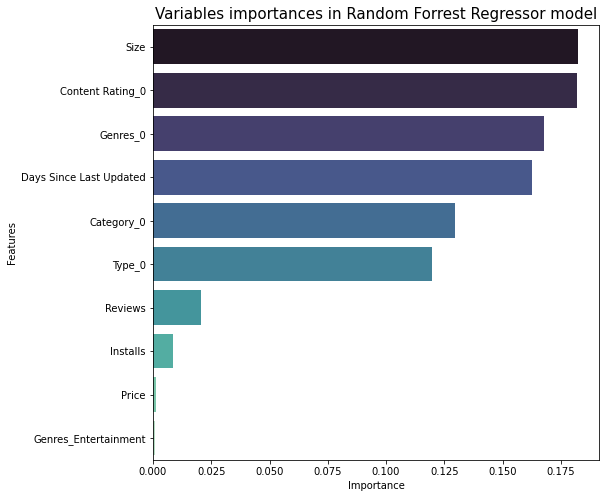

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.barplot(x='Importance', y='Features', palette="mako", data=var_coef_rf)
plt.title('Variables importances in Random Forrest Regressor model',fontsize=15);

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
# model = neighbors.KNeighborsRegressor(n_neighbors = 8)
# model.fit(train_x, train_y)  #fit the model
# pred=model.predict(test_x) #make prediction on test set
knn_model = neighbors.KNeighborsRegressor()
param_grid = {'n_neighbors': [5, 8, 10, 15, 20, 30],
              'leaf_size': [5, 10, 20, 30]}

best_knn = GridSearchCV(knn_model, param_grid
                    , scoring='neg_mean_squared_error'
                    , verbose=1)
best_knn.fit(train_x, train_y)

print("Best parameters:", best_knn.best_params_)
print("Best RMSE: ", -best_knn.best_score_)
pred = best_knn.predict(test_x)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'leaf_size': 5, 'n_neighbors': 30}
Best RMSE:  0.21091602360356737


# Evaluation

In [ ]:
# Linear Regression Evaluation metrics
print('MAE of Linear Regression:', metrics.mean_absolute_error(test_y, predictions_lr))
print('MSE of Linear Regression:', metrics.mean_squared_error(test_y, predictions_lr))
print('RMSE of Linear Regression:', sqrt(metrics.mean_squared_error(test_y, predictions_lr)))
print('R Squared Score is:', r2_score(test_y, predictions_lr))

MAE of Linear Regression: 0.2827935531792954
MSE of Linear Regression: 0.20366134075584558
RMSE of Linear Regression: 0.45128853381827194
R Squared Score is: 0.9160681788767931


In [ ]:
# Random Forest model evaluation metrics and it's the model of our choice
print('MAE of Random Forest Regressor:', metrics.mean_absolute_error(test_y, predictions_rf))
print('MSE of Random Forest Regressor:', metrics.mean_squared_error(test_y, predictions_rf))
print('RMSE of Random Forest Regressor:', sqrt(metrics.mean_squared_error(test_y, predictions_rf)))
print('R Squared Score is:', r2_score(test_y, predictions_rf))

MAE of Random Forest Regressor: 0.2610412728247626
MSE of Random Forest Regressor: 0.18537882137719144
RMSE of Random Forest Regressor: 0.43055640905367026
R Squared Score is: 0.923602672858203


In [ ]:
# K nearest neighbors model evaluation metrics
print('MAE of KNN :', metrics.mean_absolute_error(test_y, pred))
print('MSE of KNN:', metrics.mean_squared_error(test_y, pred))
print('RMSE of KNN:', sqrt(metrics.mean_squared_error(test_y, pred)))
print('R Squared Score is:', r2_score(test_y, pred))

MAE of KNN : 0.28318371943371945
MSE of KNN: 0.20432470506220504
RMSE of KNN: 0.45202290324960864
R Squared Score is: 0.9157947967312459
